## Breakdown of this notebook:
1. **Loading the dataset**: Load the data and import the libraries.
1. **Data Cleaning**: 
     * Deleting redundant columns.
     * Renaming the columns.
     * Dropping duplicates.
     * Cleaning individual columns.
1. **Data Visualization:** Using plots to find relations between the features.
1. **Finding the best cheap restaurants:** 
      * **Cheapest, Highest rated and largely voted**.
      * Is there a **relation** between **cuisine,location and the cost**?
1. **Exploring the best expensive restaurants.**
      * Restaurants that are **expensive, Highest rated and largely voted**.
      * Is there a **relation** between **restaurant type,location and the cost**?


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['zomato.csv']


In [2]:
data=pd.read_csv('../input/zomato.csv')
data.head()
# data.shape

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
print("Percentage null or na values in df")
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

Percentage null or na values in df


url                             0.00
address                         0.00
name                            0.00
online_order                    0.00
book_table                      0.00
rate                           15.03
votes                           0.00
phone                           2.34
location                        0.04
rest_type                       0.44
dish_liked                     54.29
cuisines                        0.09
approx_cost(for two people)     0.67
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

In [4]:
data.rate = data.rate.replace("NEW", np.nan)
data.dropna(how ='any', inplace = True)

In [5]:
# data.url.unique()
# data.address.unique()
# data.phone.unique()
# data[['location','listed_in(city)']]

* If you look closely at each column of the dataframe closely you will notice that there are some columns that won't contribute to the ratings and reviews. The **url** or the full **address** of the restaurant or their **phone number** can't justify their ratings or reviews.
* Note that only the address column is omitted from the dataframe and not the listed_in(city) column,because location details in listed_in(city) column can be very useful in extracting the information about the restaurants.
* Also,location and listed_in(city) are the same columns.So, we **drop the location column**.
* The names of columns are a bit non descriptive and confusing so its better to **rename** some of these columns.

In [6]:
del data['url']
del data['address']
del data['phone']
del data['location']
data.rename(columns={'approx_cost(for two people)': 'average_cost', 'listed_in(city)': 'locality','listed_in(type)': 'restaurant_type'}, inplace=True)
data.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


As you can see the rate column is string type with an extra /5 with all the ratings. This should be cleaned.It is important to convert the string back to float !!

In [7]:
X = data
X.rate = X.rate.astype(str)
X.rate = X.rate.apply(lambda x: x.replace('/5',''))
X.rate = X.rate.apply(lambda x: float(x))
X.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Data Visualization

#### Are the locations of restaurants localised to specific parts of city?

Text(0.5, 1.0, 'locality')

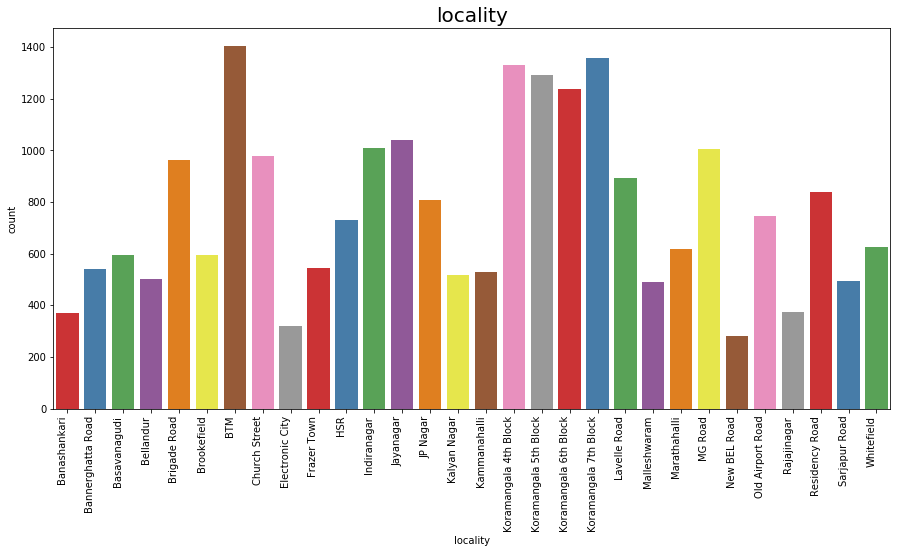

In [8]:
rcParams['figure.figsize'] = 15,7
g = sns.countplot(x="locality",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('locality',size = 20)

### Restaurant type distribution plot

Text(0.5, 1.0, 'rest_type')

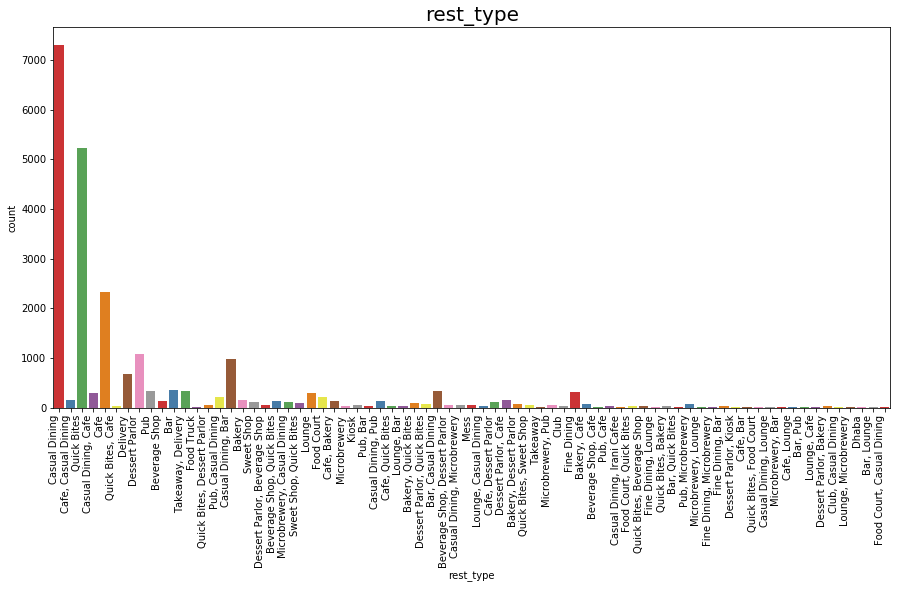

In [9]:
rcParams['figure.figsize'] = 15,7
g = sns.countplot(x="rest_type",data=data, palette = "Set1")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('rest_type',size = 20)

### Is there a relation between online order option and rating of the restaurant?

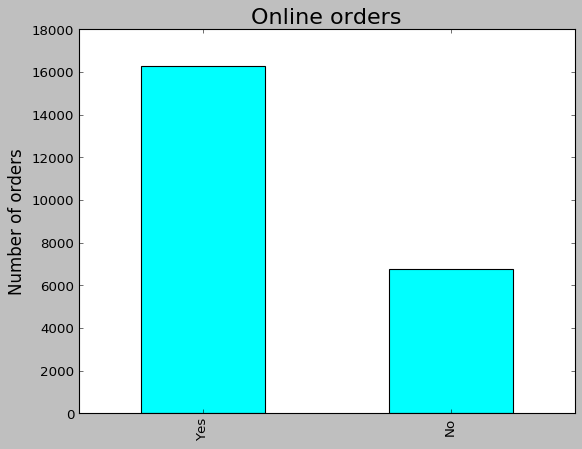

In [10]:
plt.rcParams['figure.figsize'] = (3, 4)
plt.style.use('_classic_test')

X['online_order'].value_counts().plot.bar(color = 'cyan')
plt.title('Online orders', fontsize = 20)
plt.ylabel('Number of orders', fontsize = 15)
plt.show()

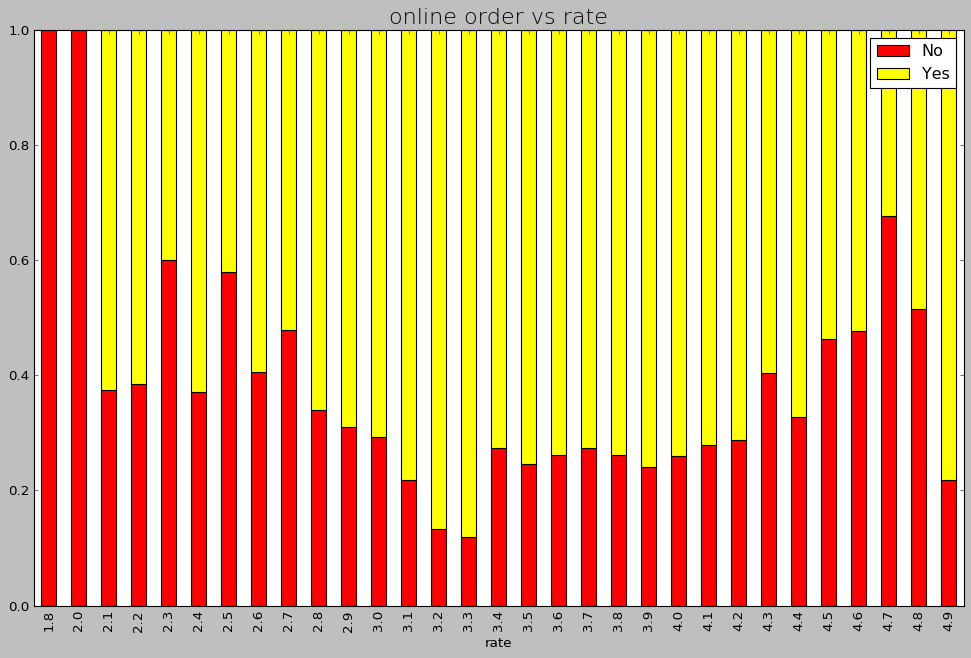

In [11]:
# X[['online_order','rate']].groupby(['rate']).sum(axis=0)
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(X['rate'], X['online_order'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('online order vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

*You are more likely to receive a higher rating if your restaurant offers* **online order** *option.*

### Is there a relation between table booking option and rating of the restaurant?

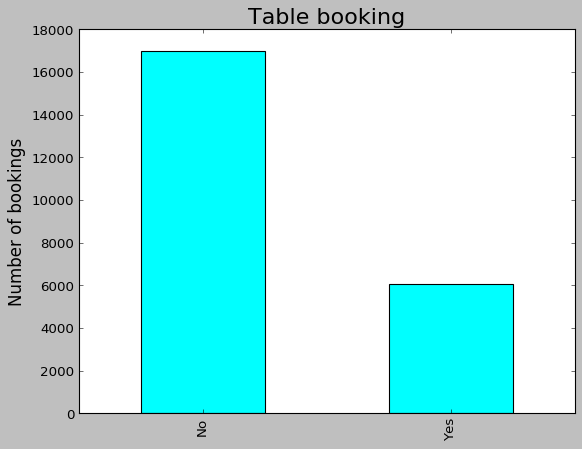

In [12]:
plt.rcParams['figure.figsize'] = (7, 9)
plt.style.use('_classic_test')

X['book_table'].value_counts().plot.bar(color = 'cyan')
plt.title('Table booking', fontsize = 20)
plt.ylabel('Number of bookings', fontsize = 15)
plt.show()

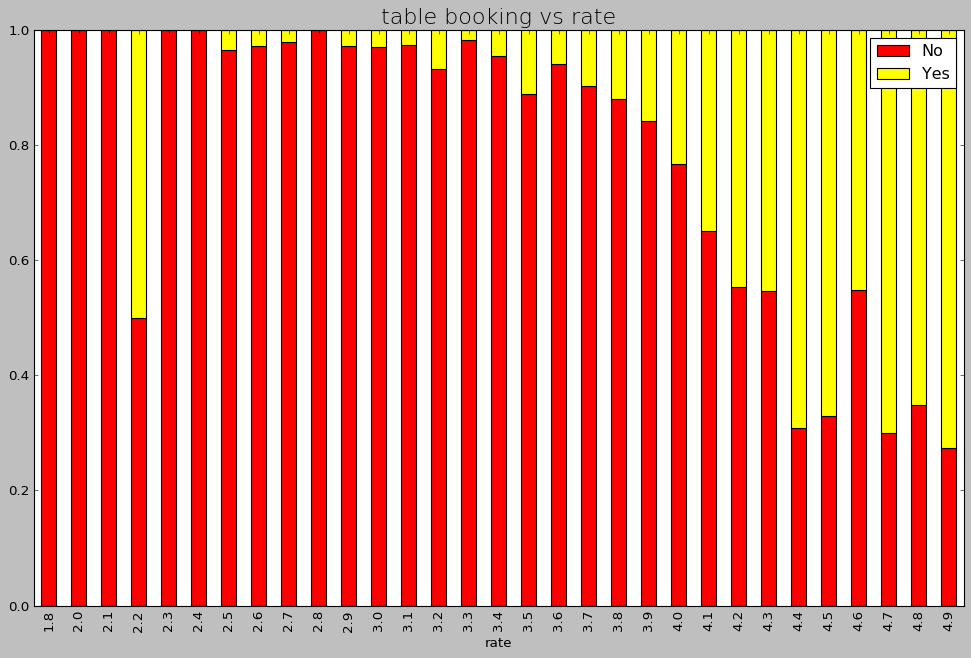

In [13]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(X['rate'], X['book_table'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()



*You can say that you have the table booking option for Highly rated restaurants.*




### Cost distribution of all the restaurants in City

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Cost Distrubution for all restaurants')

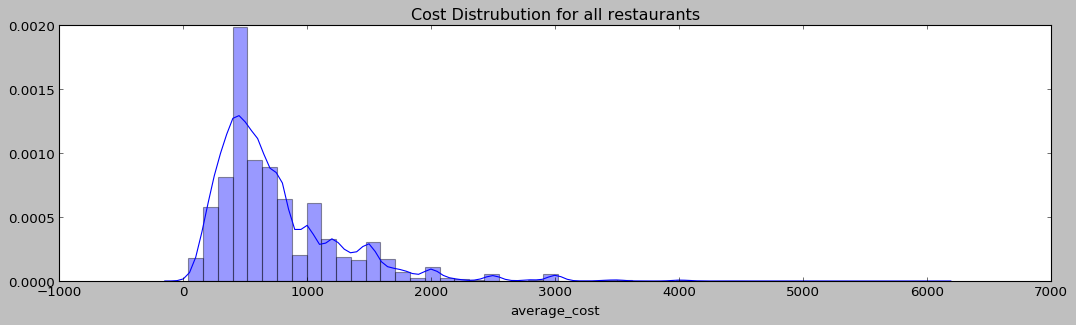

In [14]:
X.head()
X.average_cost = X.average_cost.apply(lambda x: x.replace(',',''))
X.average_cost = X.average_cost.astype(int)
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(X['average_cost'],ax=ax)
ax.set_title('Cost Distrubution for all restaurants')

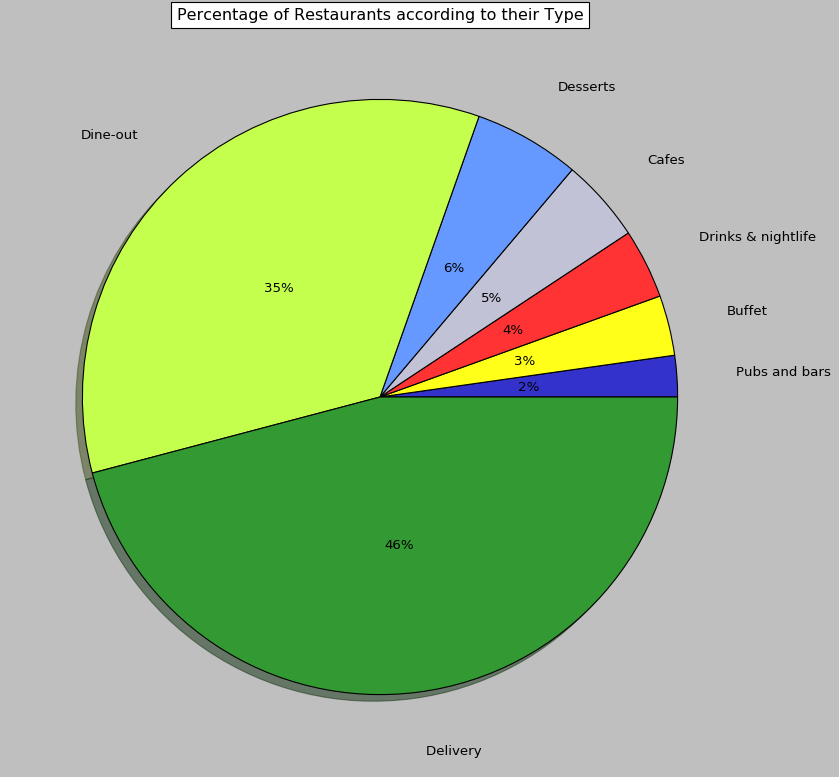

In [15]:
restaurantTypeCount=data['restaurant_type'].value_counts().sort_values(ascending=True)
slices=[restaurantTypeCount[0],
        restaurantTypeCount[1],
        restaurantTypeCount[2],
        restaurantTypeCount[3],
        restaurantTypeCount[4],
        restaurantTypeCount[5],
        restaurantTypeCount[6]]
labels=['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','Dine-out','Delivery ']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their Type", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(12,12)
plt.show()

## Finding the best restaurants:-
### The criteria for best restaurants would be  
* **cheapest**,  
* **highly rated**, 
* **reliable**(large number of votes) options.

#### First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe.


*Let me explain:-*
The most **expensive** restaurant has an average meal cost= **6000**. We'll try to stay economical and only pick the restaurants that are** 1/4th of 6000.**
*Uncomment the comments in code below to get a clearer idea !*

In [16]:
# X.average_cost.describe()
# maxi=X.average_cost.max()
# mean=X.rate.mean()
# print(mean)
X= X.drop_duplicates(subset='name',keep='first')
# dups_name = X1.pivot_table(index=['name'],aggfunc='size')
newdf=X[['name','average_cost','locality','rest_type','cuisines']].groupby(['average_cost'], sort = True)
newdf=newdf.filter(lambda x: x.mean() <= 1500)
newdf=newdf.sort_values(by=['average_cost'])

newdf_expensive=X[['name','average_cost','locality','rest_type','cuisines']].groupby(['average_cost'], sort = True)
newdf_expensive=newdf_expensive.filter(lambda x: x.mean() >= 3000)
newdf_expensive=newdf_expensive.sort_values(by=['average_cost'])
# newdf

**Now lets find the highest rated restaurants i.e rating above 4.5**
*Uncomment the last line in code below to get a clearer idea*

In [17]:
newdf_rate=X[['name','rate']].groupby(['rate'], sort = True)
newdf_rate=newdf_rate.filter(lambda x: x.mean() >= 4.5)
newdf_rate=newdf_rate.sort_values(by=['rate'])
X.rate.value_counts()
X.rate.unique()
X.nunique()
# newdf_rate

name               3142
online_order          2
book_table            2
rate                 31
votes               965
rest_type            70
dish_liked         2903
cuisines           1475
average_cost         56
reviews_list       3107
menu_item           692
restaurant_type       7
locality             30
dtype: int64

**Now, we'll merge both the dataframes obtained above to get the intersection of both  i.e the highest rated and cheapest restaurants !!**

In [18]:
s1 = pd.merge(newdf, newdf_rate, how='inner', on=['name'])

s2= pd.merge(newdf_expensive, newdf_rate, how='inner', on=['name'])

print("Cheap restaurants with low cost,high rating \n")
s1

Cheap restaurants with low cost,high rating 



,name,average_cost,locality,rest_type,cuisines,rate
0,Brahmin's Coffee Bar,100,Basavanagudi,Quick Bites,South Indian,4.8
1,Taaza Thindi,100,Banashankari,Quick Bites,South Indian,4.7
2,CTR,150,Malleshwaram,Quick Bites,South Indian,4.7
3,Chikkanna Tiffin Room,150,Brigade Road,Quick Bites,South Indian,4.5
4,Veena Stores,150,Malleshwaram,Quick Bites,South Indian,4.5
5,O.G. Variar & Sons,200,Malleshwaram,Bakery,"Bakery, Desserts",4.8
6,Mavalli Tiffin Room (MTR),250,Basavanagudi,Quick Bites,South Indian,4.5
7,Siddiqu Kabab Center,250,Brigade Road,Quick Bites,"North Indian, Rolls",4.5
8,Mugful Of Stories,300,Kalyan Nagar,Dessert Parlor,"Desserts, Bakery",4.6
9,The Pancake Story,300,BTM,Dessert Parlor,"Desserts, Beverages",4.6


In [19]:
print("Expensive restaurants with high cost,high rating \n")
s2

Expensive restaurants with high cost,high rating 



,name,average_cost,locality,rest_type,cuisines,rate
0,Rim Naam - The Oberoi,3000,Brigade Road,Fine Dining,Thai,4.6
1,Karavalli - The Gateway Hotel,3500,Brigade Road,Fine Dining,"Mangalorean, Konkan, Seafood, Kerala",4.5
2,Alba - JW Marriott Bengaluru,4000,Brigade Road,Fine Dining,Italian,4.5


### Find the most reliable restaurants: 
**Voted more the mean number of votes:- 175**  
*Uncomment the last line in code below to get a clearer idea*

In [20]:
# X1.votes.describe()
newdf_votes=X[['name','votes']].groupby(['votes'], sort = True)
newdf_votes=newdf_votes.filter(lambda x: x.mean() >= 175)
newdf_votes=newdf_votes.sort_values(by=['votes'])
# newdf_votes

## These are the most reliable, highest rated and economical restaurants:- 

We obtain this dataframe by simply taking the intersection of all the dataframes obtained above.


This dataframe obtained below shows the restaurants whose:
* Cost is below **1500**
* Rating is above **4.5**
* Votes are above **175**

In [21]:
s = pd.merge(s1, newdf_votes, how='inner', on=['name'])
s=s.sort_values(by=['average_cost'])
print("Cheap restaurants,high rating,high votes")
s

Cheap restaurants,high rating,high votes


,name,average_cost,locality,rest_type,cuisines,rate,votes
0,Brahmin's Coffee Bar,100,Basavanagudi,Quick Bites,South Indian,4.8,2679
1,Taaza Thindi,100,Banashankari,Quick Bites,South Indian,4.7,651
2,CTR,150,Malleshwaram,Quick Bites,South Indian,4.7,4408
3,Chikkanna Tiffin Room,150,Brigade Road,Quick Bites,South Indian,4.5,203
4,Veena Stores,150,Malleshwaram,Quick Bites,South Indian,4.5,2407
5,O.G. Variar & Sons,200,Malleshwaram,Bakery,"Bakery, Desserts",4.8,1156
6,Mavalli Tiffin Room (MTR),250,Basavanagudi,Quick Bites,South Indian,4.5,2896
7,Mugful Of Stories,300,Kalyan Nagar,Dessert Parlor,"Desserts, Bakery",4.6,274
8,HOMMS,300,Brookefield,Quick Bites,"Chinese, Beverages, Momos, Thai",4.5,224
13,Milano Ice Cream,400,Basavanagudi,Dessert Parlor,"Ice Cream, Desserts",4.5,197


#### Best restaurant options under 500 Rupees (average cost):-
* **Brahmin's Coffee Bar** with average cost=100 and rating=4.8 and votes=2679
* **CTR**  with average cost=150 and rating=4.7 and votes=4408
* **Veena Stores** with average cost=150 and rating=4.5 and votes=2407
* **O.G. Variar & Sons** with average cost=200 and rating=4.8 and votes=1156
* **Mavalli Tiffin Room (MTR)** with average cost=250 and rating=4.5 and votes=2896
* **Belgian Waffle Factory** with average cost=400 and rating=4.9 and votes=1746


#### Other findings:-

* Also, observe that these cheaper options (cost<500) are all either **Quick Bites, Cafe or Dessert Parlour**.
* **Casual Dining restaurants** start above 600
* 6 out of 10 of the cheapest restaurants serve **South Indian Cuisine**
* As for the **location**, these cheap restaurant option are **scattered and not localised** to any specific location of the city.

## We can also explore the expensive options :-

Here, we are only picking up the restaurants that **cost more than** **3000**(half of most expensive restaurant) and are highest rated , have large votes.

In [22]:
s = pd.merge(s2, newdf_votes, how='inner', on=['name'])
s=s.sort_values(by=['average_cost'])
s

,name,average_cost,locality,rest_type,cuisines,rate,votes
0,Rim Naam - The Oberoi,3000,Brigade Road,Fine Dining,Thai,4.6,979
1,Karavalli - The Gateway Hotel,3500,Brigade Road,Fine Dining,"Mangalorean, Konkan, Seafood, Kerala",4.5,674
2,Alba - JW Marriott Bengaluru,4000,Brigade Road,Fine Dining,Italian,4.5,583




*No surprises there!!*

**The Oberoi Hotel, Karavalli and JW Marriott** make this high profile list

Interestingly, all these restaurants have the **same location**- **Brigade Road**  and **same restaurant type**- **Fine dining**

## Please upvote and feel free to give any feedback/comment below!!